**Adım 1:** İlk adım, bağımlılıkları içe aktarmak, doğrusal regresyon için veri oluşturmak ve oluşturulan verileri görselleştirmek

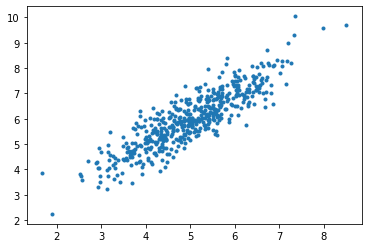

Eğitim setindeki örnek sayısı =  7200
Test setindeki örnek sayısı =  800


In [8]:
import numpy as np
import matplotlib.pyplot as plt

#verileri oluşutur
mean = np.array([5.0,6.0])
cov = np.array([[1.0,0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean,cov,8000)

#verilieri görselleştir
plt.scatter(data[:500,0], data[:500,1], marker = '.')
plt.show()


#eğitim ve test verilerini ayır
data = np.hstack((np.ones((data.shape[0],1)),data))

split_factor = 0.90
split = int(split_factor*data.shape[0])

X_train = data[:split,:-1]
y_train = data[:split,-1].reshape((-1,1))
X_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1,1))

print("Eğitim setindeki örnek sayısı = ",(X_train.shape[0]))
print("Test setindeki örnek sayısı = ",(X_test.shape[0]))

""Adım 2:"" Ardından, mini toplu gradyan inişi kullanarak doğrusal regresyon uygulamak için kod yazıyoruz. gradyanDescent() ana sürücü işlevidir ve diğer işlevler, tahminler yapmak için kullanılan yardımcı işlevlerdir – hipotez(), gradyan hesaplama – gradyan(), hesaplama hatası – maliyet() ve mini yığınlar oluşturma – create_mini_batch(). Sürücü işlevi parametreleri başlatır, model için en iyi parametre kümesini hesaplar ve bu parametreleri, parametreler güncellendikçe bir hata geçmişi içeren bir listeyle birlikte döndürür.

In [20]:
#tahminleri hesaplama fonksiyonu 
def hipotez(X,theta):
  return np.dot(X,theta)

#hata fonksiyonunun gradyanını hesapla
def gradyan(X,y,theta):
  h = hipotez(X,theta)
  grad = np.dot(X.transpose(), (h-y))
  return grad

#teta'nın mevcut değerleri için hata hesapla
def cos(X,y,theta):
  h = hipotez(X,theta)
  J = np.dot((h-y).transpose(),(h-y))
  J /= 2
  return J[0]
  
  #mini toplu paketleri içeren bir liste oluşturma
def mini_paket_olustur(X,y,batch_size):
  mini_paketler  = []
  data = np.hstack((X,y))
  np.random.shuffle(data)
  n_minipaket = data.shape[0] // batch_size 
  i = 0

  for  i in range(n_minipaket + 1):
    mini_paket = data[i*batch_size:(i + 1)*batch_size,:]
    X_mini = mini_paket[:,:-1]
    Y_mini = mini_paket[:,:-1].reshape
    mini_paketler.append((X_mini, Y_mini))
  
  if data.shape[0]%batch_size != 0:
    mini_paket = data[i*batch_size:data.shape[0]]
    X_mini = mini_paket[:,:-1]
    Y_mini = mini_paket [:,-1].reshape((-1,1))
    mini_paketler.append((X_mini, Y_mini))
  return mini_paketler


def gradiantDescent(X,y,learning_rate =  0.001, batch_size = 32):
  theta = np.zeros((X.shape[1],1))
  error_list = []
  max_iters = 3

  for  itr in range(max_iters):
    mini_paketler = mini_paket_olustur(X,y,batch_size)

    for mini_paket in mini_paketler:
      X_mini,y_mini = mini_paket
      theta = theta - learning_rate*gradyan(X_mini,y_mini,theta)
      error_list.append(cost(X_mini,y_mini,theta))

  return theta, error_list


Sapma :  [0.80514663]
Katsayılar :  [[1.0157443]]


<function matplotlib.pyplot.show(*args, **kw)>

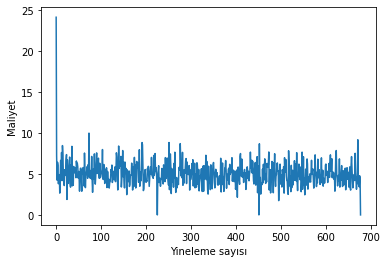

In [29]:
theta,error_list = gradyanDescent(X_train,y_train)
print("Sapma : ",theta[0])
print("Katsayılar : ",theta[1:])

#gradyan inişini görselleştirme
plt.plot(error_list)
plt.xlabel("Yineleme sayısı")
plt.ylabel("Maliyet")
plt.show

Adım #3: Son olarak, test seti üzerinde tahminler yapıyoruz ve tahminlerdeki ortalama mutlak hatayı hesaplıyoruz. 

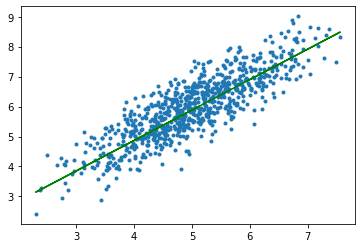

 Ortalama Mutlak Hata :  0.45876415784655944


In [35]:
#x için çıktı tahmini 
y_pred = hipotez(X_test,theta)
plt.scatter(X_test[:,1],y_test[:,], marker = '.')
plt.plot(X_test[:,1],y_pred,color = 'g')
plt.show()

#tahminlerin hesaplama hatası 
error = np.sum(np.abs(y_test-y_pred)/y_test.shape[0])
print(" Ortalama Mutlak Hata : ",error)